In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from MinHeap import *
from dijkstrasAlgorithm import *
from reconstructPath import *

In [19]:
# Create a graph from the road network of Natal, Rio Grande do Norte, Brazil
G = ox.graph_from_place("Natal, Rio Grande do Norte, Brasil", network_type="drive")

print(f"Graph has {len(G.nodes)} nodes and {len(G.edges)} edges.")
print(type(G))
# Plot the graph with specified node size and edge linewidth
#fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

Graph has 18661 nodes and 48518 edges.
<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [21]:
# Crie um novo DiGraph (grafo direcionado simples)
G_digraph = nx.DiGraph()

# Itere sobre as arestas do MultiDiGraph e adicione apenas uma aresta entre cada par de nós
for u, v, data in G.edges(data=True):
    if not G_digraph.has_edge(u, v):
        # Adicionar a aresta se não existir no DiGraph
        G_digraph.add_edge(u, v, **data)

G = G_digraph

# Verifique o tipo do grafo convertido
print(f"Graph has {len(G.nodes)} nodes and {len(G.edges)} edges.")
print(type(G))

Graph has 18661 nodes and 48423 edges.
<class 'networkx.classes.digraph.DiGraph'>


In [ ]:
# Define the coordinates of the starting point
latitude = -5.811551614738788
longitude = -35.21889920439562

# Find the nearest node to the starting point
start_node = ox.distance.nearest_nodes(G, X=longitude, Y=latitude)
print(f"Nó mais próximo das coordenadas iniciais: {start_node}")

# Calculate the distance to all other nodes from the starting node
lengths = nx.single_source_dijkstra_path_length(G, start_node, weight='length')

# Identify the farthest node and its distance
farthest_node = max(lengths, key=lengths.get)
max_distance = lengths[farthest_node]

# Print the farthest node and its distance
print(f"O ponto mais distante é o nó {farthest_node} a {max_distance:.2f} metros.")

# Check the longitude and latitude of the farthest node
farthest_node_coords = (G.nodes[farthest_node]['y'], G.nodes[farthest_node]['x'])
print(f"Coordenadas do nó mais distante: Latitude {farthest_node_coords[0]}, Longitude {farthest_node_coords[1]}")

In [ ]:
# Calculate the shortest path from the starting node to the farthest node
shortest_path = nx.shortest_path(G, source=start_node, target=farthest_node, weight='length')

# Plot the graph with the shortest path highlighted
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=2, edge_linewidth=0.5, node_size=0, bgcolor='k')

[0, 1, 2, 3, 4, 5]


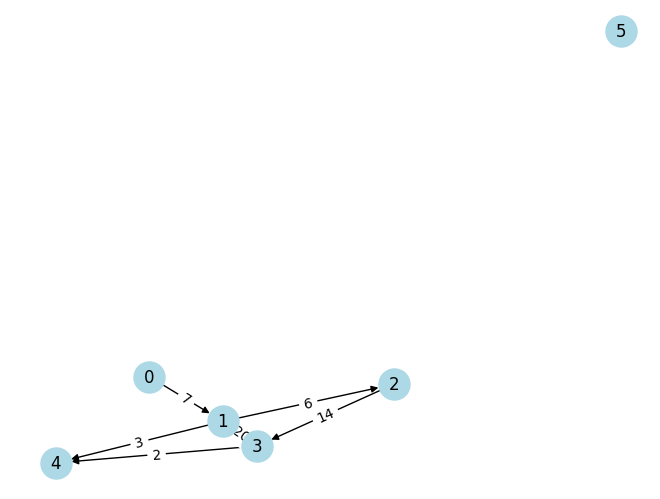

In [25]:

G = nx.DiGraph()  # Exemplo com grafo direcionado
G.add_edge(0, 1, length=7)
G.add_edge(1, 2, length=6)
G.add_edge(1, 3, length=20)
G.add_edge(1, 4, length=3)
G.add_edge(2, 3, length=14)
G.add_edge(3, 4, length=2)
G.add_node(5)  

print(list(G.nodes))

# Desenhando o grafo
pos = nx.spring_layout(G)  # Layout para a posição dos nós
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', arrows=True)

# Adicionando os pesos nas arestas
edge_labels = nx.get_edge_attributes(G, 'length')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrando o gráfico
plt.show()

In [27]:
def networkx_to_adjacency_list(G):
    adjacency_list = []
    nodes = list(G.nodes)  # Garantir a ordem consistente dos nós
    node_index_map = {node: index for index, node in enumerate(nodes)}
    reverse_map = {index: node for node, index in node_index_map.items()}  # Mapeamento reverso

    for node in nodes:
        edges = []
        for _, neighbor, edge_data in G.out_edges(node, data=True):  # Desempacotando corretamente
            length = edge_data.get('length', 1)  # Assumir peso 1 se não definido
            edges.append([node_index_map[neighbor], length])  # Usando lista em vez de tupla
        adjacency_list.append(edges)
    
    return adjacency_list, node_index_map, reverse_map

adjacency_list, node_index_map, reverse_map = networkx_to_adjacency_list(G)
print(adjacency_list[:10])
print(len(adjacency_list))

[[[1, 7]], [[2, 6], [3, 20], [4, 3]], [[3, 14]], [[4, 2]], [], []]
6


In [23]:
start = 0

minDistances, previousNodes = dijkstrasAlgorithmWithPaths(start, adjacency_list)
print(minDistances)

Erro: O vértice 14008 não está no vertexMap. vertexMap: {1010: 14, 1364: 9, 1365: 2, 1366: 15, 14007: 13, 14010: 4, 14011: 8, 14012: 7, 14013: 1, 14927: 6, 14936: 5, 16876: 0, 18509: 3, 18510: 12, 18511: 10, 18512: 11}


KeyError: 14008

In [ ]:
start = 0
edges = [
    [[1, 7]],
    [[2, 6], [3, 20], [4, 3]],
    [[3, 14]],
    [[4, 2]],
    [],
    [],
]

minDistances, previousNodes = dijkstrasAlgorithmWithPaths(start, edges)
print(minDistances)

In [ ]:
path_to_3 = reconstructPath(previousNodes, start, 3)
print(path_to_3)

def reconstruct_original_path(path, reverse_map):
    return [reverse_map[index] for index in path]

# Exemplo de uso:
reverse_map = {index: node for node, index in node_map.items()}
original_path = reconstruct_original_path(path_to_3, reverse_map)
print(original_path)  # IDs originais dos nós



In [ ]:
#start_node_index = node_index_map[529774086]
#end_node_index = node_index_map[5624856493]

#minDistances, previousNodes = dijkstrasAlgorithmWithPaths(start_node_index, adjacency_list)

path_to_end = reconstructPath(previousNodes, start, 16)
print(path_to_end)
fig, ax = ox.plot_graph_route(G, path_to_end, route_linewidth=2, edge_linewidth=0.5, node_size=0, bgcolor='k')

In [46]:
def networkx_to_adjacency_list(G):
    adjacency_list = []
    
    # Obter lista de nós, ordenada para garantir a ordem consistente
    nodes = sorted(G.nodes())
    
    # Mapear os nós para índices
    node_index_map = {node: index for index, node in enumerate(nodes)}
    
    # Criar a lista de adjacência
    for node in nodes:
        edges = []
        for _, neighbor, edge_data in G.out_edges(node, data=True):  # Obter as arestas de saída
            length = edge_data.get('length', 1)  # Usar 1 como valor padrão para o comprimento
            edges.append([node_index_map[neighbor], length])  # [índice do destino, peso]
        
        # Adicionar a lista de arestas do nó atual
        adjacency_list.append(edges)

    # Verifique se estamos incluindo um nó vazio no final
    # Quando um nó não tem arestas de saída, a lista de adjacência será uma lista vazia.
    return adjacency_list, node_index_map

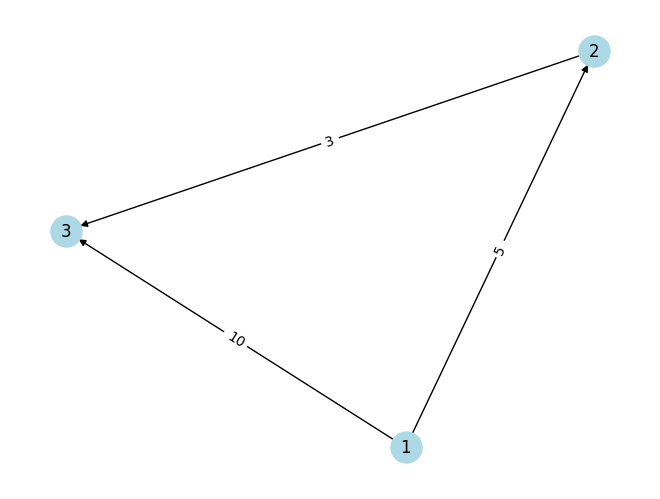

ValueError: not enough values to unpack (expected 3, got 2)

In [47]:

# Criar um exemplo simples de grafo direcionado
G = nx.DiGraph()
#G.add_edge(0, 1, length=7)
G.add_edge(1, 2, length=5)
G.add_edge(1, 3, length=10)
G.add_edge(2, 3, length=3)

# Desenhando o grafo
pos = nx.spring_layout(G)  # Layout para a posição dos nós
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', arrows=True)

# Adicionando os pesos nas arestas
edge_labels = nx.get_edge_attributes(G, 'length')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrando o gráfico
plt.show()

# Converter para lista de adjacência
adj_list, node_map, reverse_map = networkx_to_adjacency_list(G)

# Imprimir os resultados
print("Lista de adjacência:", adj_list)
print("Mapeamento de nós para índices:", node_map)
print("Mapeamento reverso:", reverse_map)
